# Assignment-07-K-Means Clustering (Airlines)

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [ ]:

airline=pd.read_csv('EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [ ]:
# Normalize heterogenous numerical data
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [ ]:

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

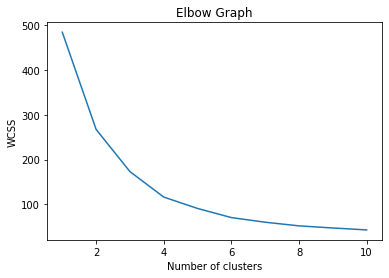

In [ ]:

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build Cluster algorithm using K=4

In [ ]:

clusters4=KMeans(4,random_state=30).fit(airline2_norm)
clusters4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [ ]:
clusters4.labels_

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

In [ ]:

airline4=airline2.copy()
airline4['clusters4id']=clusters4.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


In [ ]:

clusters4.cluster_centers_

array([[8.99048678e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262675e-03,
        2.24052643e-05, 8.50654942e-02, 9.73901648e-06],
       [5.23653977e-01, 2.37603195e-03, 9.13653056e-05, 4.56081254e-05,
        4.45095230e-05, 7.97866700e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123100e-05, 1.31443994e-01, 3.00837174e-05],
       [9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01, 4.81770304e-06],
       [6.28081328e-01, 9.30359261e-04, 2.06331617e-04, 2.06128767e-04,
        2.05879951e-04, 1.23980626e-01, 4.76413717e-04, 6.66146530e-03,
        2.24385615e-05, 6.89106611e-01, 2.58980762e-05]])

In [ ]:

airline4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064
1,1,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099
2,2,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319
3,3,5129.247934,8.285124,1.004132,1.004132,1.000000,891.388430,3.012397,66.466942,0.194215,4843.239669,0.185950


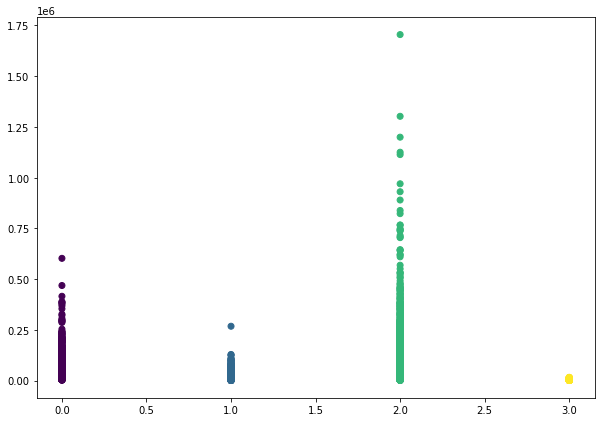

In [ ]:

plt.figure(figsize=(10, 7))  
plt.scatter(airline4['clusters4id'],airline4['Balance'], c=clusters4.labels_) 

## Build Cluster algorithm using K=5

In [ ]:

clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [ ]:
clusters5.labels_

array([0, 4, 0, ..., 1, 0, 4], dtype=int32)

In [ ]:

airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,4
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,4
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [ ]:

clusters5.cluster_centers_

array([[9.87347192e-01, 3.41837203e-03, 3.52620775e-05, 3.03479065e-05,
        3.02349363e-05, 9.15517711e-02, 1.54818686e-04, 6.61324432e-03,
        2.08325733e-05, 7.54676163e-02, 3.99111816e-06],
       [8.90527678e-01, 1.91114047e-03, 5.81321812e-05, 3.02250715e-05,
        2.95023684e-05, 4.23591789e-01, 4.07332101e-04, 7.83191039e-03,
        2.30605390e-05, 8.30790414e-02, 1.00466076e-05],
       [4.14644791e-01, 1.30104261e-18, 2.28611980e-04, 2.27627266e-04,
        2.27627266e-04, 1.50766683e-01, 5.97513433e-04, 7.35401490e-03,
        2.84888383e-05, 8.48268382e-01, 3.91049405e-05],
       [5.14097044e-01, 2.46403313e-03, 9.56772813e-05, 5.01782621e-05,
        4.88674224e-05, 8.02764990e-01, 5.20805294e-04, 1.79689628e-02,
        6.06455235e-05, 1.36723853e-01, 3.06681430e-05],
       [8.92936852e-01, 4.46454511e-03, 1.23968035e-04, 1.23783403e-04,
        1.23783403e-04, 7.58365867e-02, 2.93996886e-04, 6.32105922e-03,
        2.08016784e-05, 4.07924096e-01, 1.35510886e-

In [ ]:

airline5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,97077.624478,187.605934,1.610570,1.009272,1.001854,9664.546129,9.720909,517.313862,1.556328,3957.471952,0.270283
1,1,70974.834844,110.264854,3.144008,1.026183,1.020141,32797.468278,17.713998,450.023162,1.329305,4054.849950,0.492447
2,2,2415.576577,0.000000,1.009009,1.000000,1.000000,850.189189,3.036036,48.612613,0.171171,4723.225225,0.225225
3,3,27462.797721,116.148148,3.245014,1.034188,1.071225,41806.162393,17.572650,670.883191,1.945869,4224.609687,0.903134
4,4,11756.307494,55.263566,1.005168,1.000000,1.000000,980.863049,3.444444,93.457364,0.294574,4910.258398,0.173127


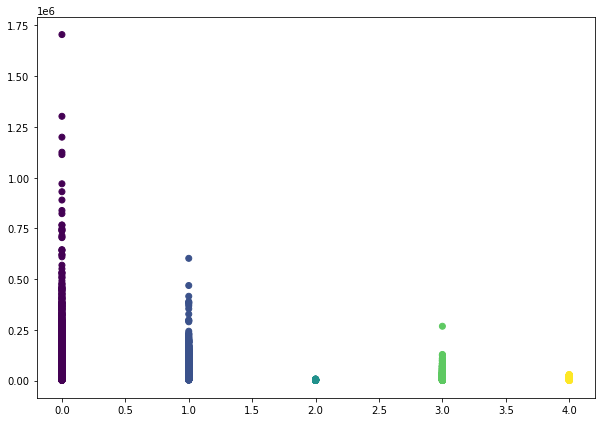

In [ ]:

plt.figure(figsize=(10, 7))  
plt.scatter(airline5['clusters5id'],airline5['Balance'], c=clusters5.labels_) 